### Table of Contents

# 1. Import Data

## 1.1 Import the needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

## 1.2 Import a integrate data

In [3]:
df_crm = pd.read_csv('crm.csv')
df_mkt = pd.read_csv('mkt.csv')
df_sales = pd.read_excel('sales.xlsx')

In [4]:
df = pd.merge(pd.merge(df_crm,df_sales,on='CustomerID',how="inner"),df_mkt,on="CustomerID",how="inner")

## 1.3 Set Index


In [5]:
df.set_index('CustomerID',inplace = True)

## 1.4 Check and removing duplicates

In [6]:
df[df.duplicated()] # checking duplicates

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
32924,Mrs. Wanda Terry,1986,Graduation,Divorced,41264.0,1,1,2020-10-03 00:00:00,61.0,70.0,20,165.0,40.0,0.0,7.0,2,3,1,3,7,0,0,0,0,0,0
8276,Mrs. Mary Jackson,1968,HighSchool,Married,118238.0,0,0,2020-10-13 00:00:00,42.0,5940.0,1002,9465.0,1100.0,1100.0,32.0,1,6,7,8,2,0,0,0,0,0,0
32966,Mr. Steven Baker,1961,HighSchool,Married,84974.0,0,1,2022-02-17 00:00:00,56.0,2610.0,840,2160.0,840.0,960.0,133.0,3,6,5,9,3,0,0,0,0,0,0
5627,Mr. Jonathan Clark,1988,Graduation,Married,40975.0,1,0,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0,0,0,0,0,0
29357,Mr. Eric Springer,1972,PhD,Married,77778.0,0,1,2022-04-19 00:00:00,92.0,1240.0,60,315.0,20.0,20.0,33.0,1,5,2,4,6,0,0,1,0,0,0
26891,Mr. Sam Peake,1992,Graduation,Married,74147.0,1,0,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0,1,0,0,0,0
21269,Mr. Nathan Glover,1971,Graduation,Married,91241.0,0,1,2022-03-28 00:00:00,18.0,1780.0,220,2370.0,540.0,380.0,59.0,1,8,3,6,5,0,0,0,0,0,0
32777,Mr. Joe James,1967,Master,Married,101251.0,0,1,2021-12-30 00:00:00,26.0,7350.0,2780,4170.0,500.0,1760.0,66.0,2,8,8,6,3,0,1,0,0,0,0
26285,Mr. Oliver Sanderson,1986,Basic,Together,22345.0,1,0,2021-03-21 00:00:00,54.0,50.0,180,285.0,240.0,280.0,39.0,3,5,2,2,9,0,1,0,0,0,0


In [7]:
df = df[~df.duplicated()] # drop duplicates rows

# 2. Explore Data

## 2.0 Data profiling

Se não quiserem instalar a biblioteca não corram esta secção. Caso contrário o comando para instalar é pip install ydata-profiling. No final **apagar esta secção**

In [ ]:
#from ydata_profiling import ProfileReport
#profile= ProfileReport (df, title= "DSML_Project")

In [ ]:
#profile.to_file('DSML_profile.html')

## 2.1 Basic Exploration

Q: _To check the number of columns and rows_ we used `shape` _attribute_

In [8]:
df.shape

(7000, 26)

> A: _The dataset has **7000 rows** and **26 columns**_

__*Q*__: Check the name of the features of the dataset we used `columns` _attribute_

In [9]:
df.columns

Index(['Name', 'Birthyear', 'Education', 'Marital_Status', 'Income',
       'Kid_Younger6', 'Children_6to18', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Complain', 'Response_Cmp1', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5'],
      dtype='object')

> A: The dataset has the following columns/features names: <br>
        >Index. CustomerID
        >1. 'Name' <br>
        >2. 'Birthyear'<br>
        >3. 'Education'<br>
        >4. 'Marital_Status'<br>
        >5. 'Income'<br>
        >6. 'Kid_Younger6'<br>
        >7. 'Children_6to18'<br>
        >8. 'Date_Adherence'<br>
        >9. 'Recency'<br>
        >10. 'MntMeat&Fish'<br>
        >11. 'MntEntries'<br>
        >12. 'MntVegan&Vegetarian'<br>
        >13. 'MntDrinks'<br>
        >14. 'MntDesserts'<br>
        >15. 'MntAdditionalRequests'<br>
        >16. 'NumOfferPurchases'<br>
        >17. 'NumAppPurchases'<br>
        >18. 'NumTakeAwayPurchases'<br>
        >19. 'NumStorePurchases'<br>
        >20. 'NumAppVisitsMonth'<br>
        >21. 'Complain'<br>
        >22. 'Response_Cmp1'<br>
        >23. 'Response_Cmp2'<br>
        >24. 'Response_Cmp3'<br>
        >25. 'Response_Cmp4'<br>
        >26. 'Response_Cmp5'<br>

Q: First glance of the dataset using `head` and `tail` methods to check the first and last 5 rows.

In [10]:
df.head(3)

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,2021-01-09 00:00:00,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0
19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0,2021-04-10 00:00:00,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0
29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0,2022-01-12 00:00:00,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0


In [11]:
df.tail(3)

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1,2021-12-15 00:00:00,30.0,540.0,0,135.0,0.0,0.0,5.0,2,3,1,4,6,0,0,0,0,0,0
23312,Miss Angela Murray,1989,Graduation,Single,44867.0,1,0,2020-11-12 00:00:00,8.0,80.0,120,210.0,120.0,100.0,17.0,1,3,1,3,8,0,0,0,0,0,0
15581,Miss Diana Taylor,1960,Graduation,Single,124379.0,0,0,2021-02-04 00:00:00,80.0,7280.0,422,1692.0,3760.0,1880.0,235.0,1,6,12,11,2,0,0,0,1,1,0


Q: To check the basic information of the dataset we've used the `info` method

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

>A: We can observe the data type of the dataset and the how many of features per data type  `dtypes: float64 - (7), int64 - (15), object - (4)`, the memory usage of `1.4+MB`, and the non-null values present per columns. <br>
> Using only `info` method we understand that `'Education', 'Recency', 'MntDrinks'` have __14, 23, 28 null values__ that require some action.

# 2.2 Statistical Exploration

## 2.2.1 Numerical Variables

In [13]:
df.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
count,7000.000000,7000.000000,7000.000000,7000.000000,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,49.235058,3079.523800,534.749429,2785.050786,545.657544,540.656029,42.556186,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286,0.079143,0.073286,0.083000,0.065857,0.014286
std,11.996270,35409.810253,0.543477,0.542174,28.922688,3370.377166,787.846684,3908.718244,805.149088,802.221866,49.650747,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903,0.269981,0.260624,0.275902,0.248050,0.118675
min,1948.000000,2493.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,51586.250000,0.000000,0.000000,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1977.000000,77190.000000,0.000000,0.000000,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1985.000000,102016.250000,1.000000,1.000000,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2005.000000,237639.725000,2.000000,2.000000,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> _The describe return we can get a first glance and make some conclusion:_

>__Birthyear__ - could originate an Age column for readability purposes<br>
__Income__ - Min and Max are very far from each other and far from the mean value which could indicate outliers<br>
__Recency__ - 6977 valid values, hence we should look in deep and decide on how to minimize that effect of missing values<br>
__MntMeat&Fish__ - Min and Max are distant from each other and have high standard deviation which could effect some future conclusion<br>
__MntEntries__ - Again has high standard deviation that we should analyze, Min and Max far apart, similar to MntMeat&Fish<br>
__MntVegan&Vegetarian__ - Similar to the previous two Mnt columns<br>
__MntDrinks, MntDesserts__ - Seems to be very similar between them<br>
__MntAdditionalRequests__ - The max value standard deviation seems high and also the max value very far apart from the mean<br>
__NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth__  - Have a max value to distante from the mean that could be true but we need to take into account<br>
__NumAppPurchases, SumStorePurchases__ - Seems does not have strange summary statistcs<br>
__Kid_Younger6, Children_6to18__ - 75% of clients have at least one child

**Q**: Skewness of each variable 

In [14]:
df.skew()

/var/folders/gt/lg95g0n95mqdr3vk5d1k062h0000gn/T/ipykernel_67770/547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
dtype: float64

Concerning the variables' skewness, we can conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Birthyear, Income, Kid_Younger6, Children_6to18, Recency, NumAppPurchases, NumStorePurchases, NumAppVisitsMonth
- `High skewness (higher than |1.0|)`: MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5

In [15]:
df.kurt()

/var/folders/gt/lg95g0n95mqdr3vk5d1k062h0000gn/T/ipykernel_67770/3952544226.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
dtype: float64

Features with kurtosis higher than 3 could indicate presence of outliers, hence we should have special considerantion with the following features:
>MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, NumOfferPurchases, NumAppVisitsMonth

Note: Binomial Variables Complain, and Response_Cmp1 the kurtosis we will not consider as outliers

## 2.2.2 Categorical Values

In [16]:
df.describe(include = object)

,Name,Education,Marital_Status,Date_Adherence
count,7000,6986,7000,7000
unique,6241,9,10,701
top,Mr. Stewart Grant,Graduation,Married,2020-09-19 00:00:00
freq,3,3497,2830,23


> We can conclude that the education as **14 missing** values

#### Level/Possible values of Categorical Features

### `Name` prefix unique values and count

In [17]:
df['Name'].str.partition(" ")[0].value_counts()

Mr.     5133
Miss    1469
Mrs.     398
Name: 0, dtype: int64

With the prefix we can generate a `gender` feature to further explore the dataset. We will deal with that in the data transformation capther

#### **`Gender`** feature creation

In [18]:
df["Gender"] = df['Name'].str.partition(" ")[0]
df = df.replace({"Gender":{"Mr.": 1,"Miss": 0,"Mrs.": 0}})

### `Education` unique values and count

In [19]:
df["Education"].value_counts()

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

We have some issues that will need trasformatioin:<br>
- Graduation, Master, HighSchool are written in different ways<br>
- `Basic` and `HighSchool` need different levels?

#### Education standardization

In [20]:
df = df.replace({"Education":{"master":"Master", "graduation":"Graduation", "phd":"PhD","highschool":"HighSchool"}})

### `Marital_Status` unique values and count

In [21]:
df["Marital_Status"].value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

Similarly to previous feature we also have some issues that need transformation:<br>
- Married, Together, Single, Divorced and Widow are written with lower and capital letters
- We could also consider that Married and Together are similar and joined them in the same level<br>

#### Marital_Status standardization

In [22]:
df = df.replace({"Marital_Status":{"married":"Married", "together":"Married", "single":"Single","widow":"Widow","divorced":"Divorced","Together":"Married"}})
df["Marital_Status"].value_counts()

Married     4572
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

`Date_Adherence` unqiue values and count

In [23]:
df["Date_Adherence"].value_counts()

2020-09-19    23
2021-08-22    20
2021-07-30    20
2022-05-23    20
2021-08-21    19
              ..
2021-03-09     3
2020-09-18     2
2020-07-30     2
2020-08-29     2
2021-03-22     2
Name: Date_Adherence, Length: 701, dtype: int64

`Date_Adherence` is a date and will need transformation to a date format for further exploration

## 2.3 Visual Exploration

### 2.3.1 Numerical Variables

<AxesSubplot:>

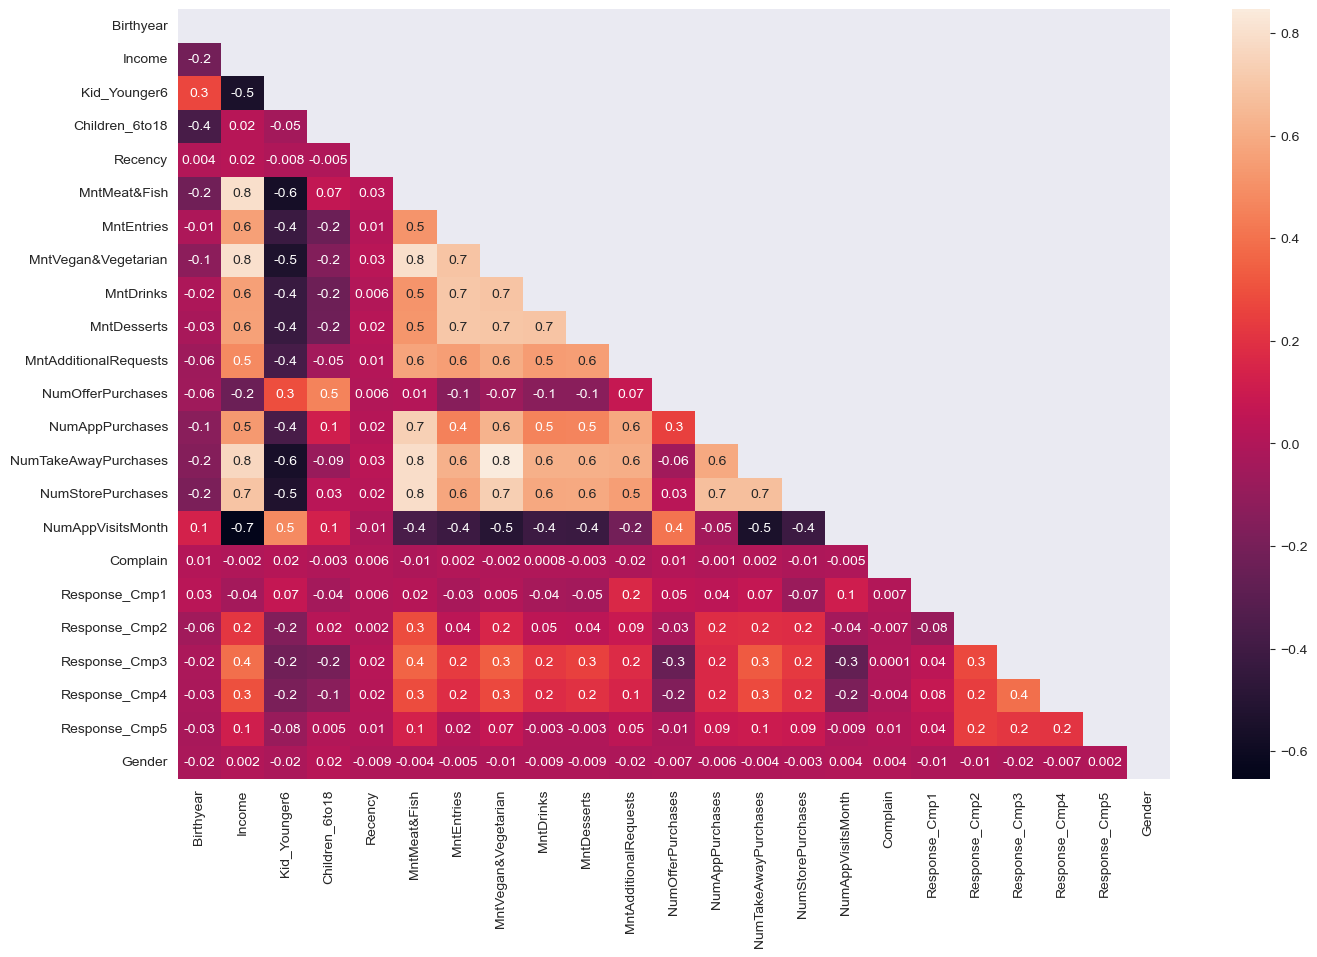

In [24]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g', mask = np.triu(df_corr))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))
sns.histplot(ax = ax1, data = df, x = 'Birthyear', color="c", bins= 5)
sns.histplot(ax = ax2, data = df, x = 'Birthyear', color="c")

- Birthyear at glance using 5 bins seems to follow a normally distribution shape, althought zooming in we can observe some heavy drops that we should explore further

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(10,6), sharex = True, sharey= True)
sns.countplot(ax = ax1, data = df, x = 'Kid_Younger6', color="y", alpha = 0.8)
sns.countplot(ax = ax2, data = df, x = 'Children_6to18', color="m", alpha = 0.5)
sns.countplot(ax = ax3, x = df["Kid_Younger6"]+df["Children_6to18"])
plt.xlabel("Total number of kids")

- Here we can see that the clients majority one child, having either one `Kid_Younger6` or one `Children_6to18` years of age

In [ ]:
sns.histplot(data = df['Recency'], color="k", alpha=0.3)

In [ ]:
sns.histplot(data = df['Income'], color="g", alpha=0.3)

- `Income` suggest normal distribution with possible some outliers around 220k of monetary units

#### Income vs Gender

In [ ]:
sns.stripplot(data = df, x = "Income", y = "Gender")

In [ ]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.histplot(ax = ax1, data = df, x = 'MntMeat&Fish', color="g")
sns.histplot(ax = ax2, data = df, x = 'MntVegan&Vegetarian', color="b")
sns.histplot(ax = ax3, data = df, x = 'MntEntries', color="r")
sns.histplot(ax = ax4, data = df, x = 'MntDrinks', color="y")
sns.histplot(ax = ax5, data = df, x = 'MntDesserts', color="w")
sns.histplot(ax = ax6, data = df, x = 'MntAdditionalRequests', color="m")

- `MntMeat&Fish` and `MntVegan&Vegatarian` are the categories where customers spend the most
- `MntVegan&Vegetarian` seems to have **outliers** above the 15000 price units
- All the `Mnt%` variables have a heavy concentration of values on the lower values of monetary units axis

#### Total Monetary Spend feature creation and display

In [25]:
df["MntTotal"] = df['MntMeat&Fish'] + df['MntEntries'] + df['MntVegan&Vegetarian'] + df['MntDrinks'] + df['MntDesserts'] + df['MntAdditionalRequests']
df["MntTotal"]
# em falta Mnt Add Requests

CustomerID
14594    16676.0
19070    21486.0
29888    13448.0
12221     5634.0
21107    17303.0
          ...   
30686    15665.0
17210    24246.0
29186      680.0
23312      647.0
15581    15269.0
Name: MntTotal, Length: 7000, dtype: float64

In [ ]:
sns.histplot(data = df, x = 'MntTotal', color="g")

In [ ]:
def scatterplot_list(data: pd.DataFrame, x: list, y: list, hue: str, marker_size: int = 50, figsize: tuple = (10, 6), rug: bool = False, ax: plt.Axes = None):
    if ax is None:
        num_subplots = len(y) * len(x)
        if num_subplots == 1:
            fig, axs = plt.subplots(1, 1, figsize=figsize)
            axs = [axs]
        else:
            num_rows = (num_subplots + 1) // 2
            num_cols = 2 if num_subplots > 1 else 1
            fig, axs = plt.subplots(num_rows, num_cols, figsize=(figsize[0]*num_cols, figsize[1]*num_rows))
            axs = axs.ravel()
    else:
        axs = ax

    for i, x_var in enumerate(x):
        for j, y_var in enumerate(y):
            idx = j * len(x) + i
            sns.scatterplot(data=data, x=x_var, y=y_var, hue=hue, s=marker_size, ax=axs[idx], palette='Dark2', label=hue)
            axs[idx].set_xlabel(x_var)
            axs[idx].set_ylabel(y_var)
            axs[idx].legend(loc='upper right')
            if rug:
                sns.rugplot(data=data, x=x_var, y=y_var, hue=hue, ax=axs[idx], alpha=0.5)

    plt.tight_layout()
    plt.show()

#### Scatter plot Monetary vs Income vs Gender

In [ ]:
scatterplot_list(data= df, x= ['Income'], y= ['MntTotal'], hue= 'Gender')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, x = "Income", y = "MntMeat&Fish", hue = "Gender")
sns.scatterplot(ax = ax2, data = df, x = "Income", y = "MntVegan&Vegetarian", hue = "Gender")
sns.scatterplot(ax = ax3, data = df, x = "Income", y = "MntEntries", hue = "Gender")
sns.scatterplot(ax = ax4, data = df, x = "Income", y = "MntDrinks", hue = "Gender")
sns.scatterplot(ax = ax5, data = df, x = "Income", y = "MntDesserts", hue = "Gender")
sns.scatterplot(ax = ax6, data = df, x = "Income", y = "MntAdditionalRequests", hue = "Gender")

#### Scatter plot the Monetery vs Income vs "Total of Kids"

In [26]:
df["Total_Kids"] = df["Kid_Younger6"] + df["Children_6to18"]

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, x = "Income", y = "MntMeat&Fish", hue = "Total_Kids")
sns.scatterplot(ax = ax2, data = df, x = "Income", y = "MntVegan&Vegetarian", hue = "Total_Kids")
sns.scatterplot(ax = ax3, data = df, x = "Income", y = "MntEntries", hue = "Total_Kids")
sns.scatterplot(ax = ax4, data = df, x = "Income", y = "MntDrinks", hue = "Total_Kids")
sns.scatterplot(ax = ax5, data = df, x = "Income", y = "MntDesserts", hue = "Total_Kids")
sns.scatterplot(ax = ax6, data = df, x = "Income", y = "MntAdditionalRequests", hue = "Total_Kids")

- Here we conclude that customer with less kid spend more money in general accross all subcategories
- In the `MntVegan&Vegetarian`subcategory the higher spenders are clearly the one's with no children

#### Scatter plot the Monetery vs Income vs "Kid_Younger6"

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, x = "Income", y = "MntMeat&Fish", hue = "Kid_Younger6")
sns.scatterplot(ax = ax2, data = df, x = "Income", y = "MntVegan&Vegetarian", hue = "Kid_Younger6")
sns.scatterplot(ax = ax3, data = df, x = "Income", y = "MntEntries", hue = "Kid_Younger6")
sns.scatterplot(ax = ax4, data = df, x = "Income", y = "MntDrinks", hue = "Kid_Younger6")
sns.scatterplot(ax = ax5, data = df, x = "Income", y = "MntDesserts", hue = "Kid_Younger6")
sns.scatterplot(ax = ax6, data = df, x = "Income", y = "MntAdditionalRequests", hue = "Kid_Younger6")

- Here it's possible to conclude that the subgroup with kids under 6 years spend little money on both `Meat&Fish`and  `Vegan&Vegetarian` that could relate on the fact that younger kids have their own food

#### Scatter plot the Monetery vs Income vs "Children_6to18"

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, x = "Income", y = "MntMeat&Fish", hue = "Children_6to18")
sns.scatterplot(ax = ax2, data = df, x = "Income", y = "MntVegan&Vegetarian", hue = "Children_6to18")
sns.scatterplot(ax = ax3, data = df, x = "Income", y = "MntEntries", hue = "Children_6to18")
sns.scatterplot(ax = ax4, data = df, x = "Income", y = "MntDrinks", hue = "Children_6to18")
sns.scatterplot(ax = ax5, data = df, x = "Income", y = "MntDesserts", hue = "Children_6to18")
sns.scatterplot(ax = ax6, data = df, x = "Income", y = "MntAdditionalRequests", hue = "Children_6to18")

#### Kids boolean variable creation

In [27]:
df["has_Kids"] = df["Total_Kids"].apply(lambda x: 0 if x == 0 else 1)
df["has_Kids"]

CustomerID
14594    0
19070    0
29888    0
12221    1
21107    0
        ..
30686    0
17210    0
29186    1
23312    1
15581    0
Name: has_Kids, Length: 7000, dtype: int64

#### Income vs Total Monetary vs Kids (Y/N)

In [ ]:
sns.scatterplot(data = df, x = "Income", y = "MntTotal", hue = "has_Kids")

- From this scatterplot we can see that in general costumer without has_Kids spend more money than the one's who have

Now let's try to understand in the behavior in the monetary subclasses

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, x = "Income", y = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, x = "Income", y = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, x = "Income", y = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, x = "Income", y = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, x = "Income", y = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, x = "Income", y = "MntAdditionalRequests", hue = "has_Kids")

#### Monetary vs Income vs Education

In [ ]:
sns.scatterplot(data = df, hue = "Education", x = "MntTotal", y = "Income")
sns.rugplot(data = df, hue = "Education", x = "MntTotal", y = "Income")

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, hue = "Education", x = "MntMeat&Fish", y = "Income")
sns.rugplot(ax = ax1, data = df, hue = "Education", x = "MntMeat&Fish", y = "Income")
sns.scatterplot(ax = ax2, data = df, hue = "Education", x = "MntVegan&Vegetarian", y = "Income")
sns.rugplot(ax = ax2, data = df, hue = "Education", x = "MntVegan&Vegetarian", y = "Income")
sns.scatterplot(ax = ax3, data = df, hue = "Education", x = "MntEntries", y = "Income")
sns.rugplot(ax = ax3, data = df, hue = "Education", x = "MntEntries", y = "Income")
sns.scatterplot(ax = ax4, data = df, hue = "Education", x = "MntDrinks", y = "Income")
sns.rugplot(ax = ax4, data = df, hue = "Education", x = "MntDrinks", y = "Income")
sns.scatterplot(ax= ax5, data = df, hue = "Education", x = "MntDesserts", y = "Income")
sns.rugplot(ax = ax5, data = df, hue = "Education", x = "MntDesserts", y = "Income")
sns.scatterplot(ax = ax6, data = df, hue = "Education", x = "MntAdditionalRequests", y = "Income")
sns.rugplot(ax = ax6, data = df, hue = "Education", x = "MntAdditionalRequests", y = "Income")

#### Monetary vs Education

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.stripplot(ax = ax1, data = df, y = "Education",  order = ["Basic", "HighSchool", "Graduation","Master","PhD"],  x = "MntMeat&Fish")
sns.stripplot(ax = ax2, data = df, y = "Education",  order = ["Basic", "HighSchool", "Graduation","Master","PhD"],  x = "MntVegan&Vegetarian")
sns.stripplot(ax = ax3, data = df, y = "Education",  order = ["Basic", "HighSchool", "Graduation","Master","PhD"],  x = "MntEntries")
sns.stripplot(ax = ax4, data = df, y = "Education",  order = ["Basic", "HighSchool", "Graduation","Master","PhD"],  x = "MntDrinks")
sns.stripplot(ax = ax5, data = df, y = "Education",  order = ["Basic", "HighSchool", "Graduation","Master","PhD"],  x = "MntDesserts")
sns.stripplot(ax = ax6, data = df, y = "Education",  order = ["Basic", "HighSchool", "Graduation","Master","PhD"],  x = "MntAdditionalRequests")

#### Marital_Status vs Monetary vs has_Kids

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "Marital_Status", x = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "Marital_Status", x = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "Marital_Status", x = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "Marital_Status", x = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "Marital_Status", x = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Marital_Status", x = "MntAdditionalRequests", hue = "has_Kids")

> No valuable information besides the perception that every `Marital_Status` have has_Kids

#### Monetary vs Number of Purchases

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntTotal", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntTotal", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntTotal", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntTotal", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntTotal", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntTotal", hue = "has_Kids")

> **Info** Mnt Total
- NumberOfferPurchases: The customer who most use **Offers** have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used **Food Apps** less than 4 times spend much less money than the rest, and the costumers without has_Kids tend to spend more
- NumTakeAway - Customer who ordered **take-away** less than 4 times spend much less money than the rest, and the customer without has_Kids spend more money than the one's with has_Kids.
- NumStorePurchases - Again, Customer who went the **store** less than 4 times spend much less money than the rest, and customer without has_Kids tend to spend more
- NumAppVisitsMonth - The customers who have has_Kids visit the restautant in **Food delivery apps** more often (monthly) than the one's without, nevetheless the one's without has_Kids tend to spend more (Here you could try to understand the _**value per visit**_ to try to boost the usage of the app from nohas_Kids customer)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntMeat&Fish", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntMeat&Fish", hue = "has_Kids")

> **Info** Meat&Fish
- NumberOfferPurchases: The customer who most use **Offers** have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used **Food Apps** less than 4 times spend much less money than the rest and the customer without has_Kids tend to spend more
- NumTakeAway - Customer who ordered **take-away** less than 4 times spend much less money than the rest, and the customer without has_Kids spend order more take-away more often
- NumStorePurchases - Again, Customer who went the **store** less than 4 times spend much less money than the rest
- NumAppVisitsMonth - The customers who have has_Kids visit the restautant in **Food delivery apps** more often (monthly) than the one's without, nevetheless the one's without has_Kids tend to spend more (Here you could try to understand the _**value per visit**_ to try to boost the usage of the app from no has_Kids customer)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntVegan&Vegetarian", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntVegan&Vegetarian", hue = "has_Kids")

> **Info** Mnt&Vegetarian
- NumberOfferPurchases: The customer who most use **Offers** have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used **Food Apps** less than 4 times spend much less money than the rest, customers without has_Kids tend to spend more
- NumTakeAway - Customer who ordered **take-away** less than 4 times spend much less money than the rest, and the customer without has_Kids spend more money than the one's with has_Kids.
- NumStorePurchases - Again, Customer who went the **store** less than 4 times spend much less money than the rest, and customer without has_Kids tend to spend more
- NumAppVisitsMonth - The customers whome have has_Kids visit the restautant in **Food delivery apps** more often (monthly) than the one's without, nevetheless the one's without has_Kids tend to spend more (Here you could try to understand the _**value per visit**_ to try to try to boost the usage of the app from nohas_Kids customer)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntEntries", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntEntries", hue = "has_Kids")

> **Info** MntEntries
- NumberOfferPurchases: The customer who most use **Offers** have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used **Food Apps** less than 4 times spend much less money than the rest
- NumTakeAway - Customer who ordered **take-away** less than 3 times spend much less money than the rest, and the customer without has_Kids spend more money than the one's with has_Kids.
- NumStorePurchases - Customer who went the **store** less than 4 times spend much less money than the rest
- NumAppVisitsMonth - The customers whome have has_Kids visit the restautant in **Food delivery apps** more often (monthly) than the one's without, nevetheless the one's without has_Kids tend to spend more (Here you could try to understand the _**value per visit**_ to try to try to boost the usage of the app from nohas_Kids customer)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntDrinks", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntDrinks", hue = "has_Kids")

**Info** MntDrinks
- NumberOfferPurchases: The customer who most use Offers have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used Food Apps less than 4 times spend much less money than the rest
- NumTakeAway - Customer who ordered take-away less than 3 times spend much less money than the rest, and the customer without has_Kids spend more money and order more often than the one’s with has_Kids.
- NumStorePurchases - Customer who went the store less than 4 times spend much less money than the rest
- NumAppVisitsMonth - The customers whome have has_Kids visit the restautant in Food delivery apps more often (monthly) than the one’s without, nevetheless the one’s without has_Kids tend to spend more (Here you could try to understand the value per visit to try to try to boost the usage of the app from nohas_Kids customer)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntDesserts", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntDesserts", hue = "has_Kids")

**Info** MntDesserts
- NumberOfferPurchases: The customer who most use Offers have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used Food Apps less than 4 times spend much less money than the rest
- NumTakeAway - Customer who ordered take-away less than 3 times spend much less money than the rest, and the customer without has_Kids spend more money and order more often than the one’s with has_Kids.
- NumStorePurchases - Customer who went the store less than 4 times spend much less money than the rest
- NumAppVisitsMonth - The customers whome have has_Kids visit the restautant in Food delivery apps more often (monthly) than the one’s without, nevetheless the one’s without has_Kids tend to spend more (Here you could try to understand the value per visit to try to try to boost the usage of the app from nohas_Kids customer)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "MntAdditionalRequests", hue = "has_Kids")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "MntAdditionalRequests", hue = "has_Kids")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "MntAdditionalRequests", hue = "has_Kids")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "MntAdditionalRequests", hue = "has_Kids")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "MntAdditionalRequests", hue = "has_Kids")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "MntAdditionalRequests", hue = "has_Kids")

**Info** MntAdditionaalRequests
- NumberOfferPurchases: The customer who most use Offers have has_Kids, and that the majority of money spend is without offers
- NumAppPurchases: Customer who used Food Apps less than 4 times spend much less money than the rest, and customers with has_Kids do it more often
- NumTakeAway - Customer who ordered take-away less than 3 times spend much less money than the rest, and the customer without has_Kids spend more money and order more often than the one’s with has_Kids.
- NumStorePurchases - Customer who went the store less than 4 times spend much less money than the rest
- NumAppVisitsMonth - The customers whome have has_Kids visit the restautant in Food delivery apps more often (monthly) than the one’s without (Here you could try to understand the value per visit to try to try to boost the usage of the app from nohas_Kids customer)

### Number of Purchases visualization

In [ ]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.histplot(ax = ax1, data = df, x = 'NumOfferPurchases', color="g")
sns.histplot(ax = ax2, data = df, x = 'NumAppPurchases', color="b")
sns.histplot(ax = ax3, data = df, x = 'NumTakeAwayPurchases', color="r")
sns.histplot(ax = ax4, data = df, x = 'NumStorePurchases', color="y")
sns.histplot(ax = ax5, data = df, x = 'NumAppVisitsMonth', color="k")
sns.countplot(ax = ax6, data = df, x = 'Complain', color="c")

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.scatterplot(ax = ax1, data = df, y = "NumOfferPurchases", x = "Income", hue = "Gender")
sns.scatterplot(ax = ax2, data = df, y = "NumAppPurchases", x = "Income", hue = "Gender")
sns.scatterplot(ax = ax3, data = df, y = "NumTakeAwayPurchases", x = "Income", hue = "Gender")
sns.scatterplot(ax = ax4, data = df, y = "NumStorePurchases", x = "Income", hue = "Gender")
sns.scatterplot(ax = ax5, data = df, y = "NumAppVisitsMonth", x = "Income", hue = "Gender")
sns.scatterplot(ax = ax6, data = df, y = "Complain", x = "Income", hue = "Gender")

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (20,16))
sns.stripplot(ax = ax1, data = df, x = "NumOfferPurchases", y = "Marital_Status", hue = "Gender")
sns.stripplot(ax = ax2, data = df, x = "NumAppPurchases", y = "Marital_Status", hue = "Gender")
sns.stripplot(ax = ax3, data = df, x = "NumTakeAwayPurchases", y = "Marital_Status", hue = "Gender")
sns.stripplot(ax = ax4, data = df, x = "NumStorePurchases", y = "Marital_Status", hue = "Gender")
sns.stripplot(ax = ax5, data = df, x = "NumAppVisitsMonth", y = "Marital_Status", hue = "Gender")
sns.stripplot(ax = ax6, data = df, x = "Complain", y = "Marital_Status", hue = "Gender")

#### 

In [28]:
df_long = pd.melt(df[['Response_Cmp1', 'Response_Cmp2','Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5']])

In [ ]:
sns.countplot(data = df_long, y = 'variable', hue='value')

In [29]:
df.head()

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,MntTotal,Total_Kids,has_Kids
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,2021-01-09 00:00:00,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,16676.0,0,0
19070,Miss Grace Black,1974,Graduation,Married,114297.0,0,0,2021-04-10 00:00:00,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,21486.0,0,0
29888,Mr. Gavin Morrison,1960,PhD,Married,115476.0,0,0,2022-01-12 00:00:00,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,13448.0,0,0
12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1,2021-10-12 00:00:00,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,5634.0,2,1
21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0,2020-12-11 00:00:00,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,17303.0,0,0


In [ ]:
# sns.stripplot(data = df, y = "has_Kids", x = "MntTotal", hue = "Response_Cmp1")

### 2.3.2 Categorical Variables

In [30]:
df.describe(include = "object")

,Name,Education,Marital_Status,Date_Adherence
count,7000,6986,7000,7000
unique,6241,5,4,701
top,Mr. Stewart Grant,Graduation,Married,2020-09-19 00:00:00
freq,3,3504,4572,23


In [ ]:
sns.countplot(data = df, x = 'Education', order = ["Basic","HighSchool", "Graduation","Master","PhD"])

**Question** should we join basic and highschool into undergrate level?

In [ ]:
sns.countplot(data = df, x = 'Marital_Status')

**Question** should we reduce Together and Married into one level?

In [ ]:
sns.countplot(data = df, x = 'Gender')

In [ ]:
sns.stripplot(data = df, y = "Education",x = "Income")

In [ ]:
sns.stripplot(data = df, y = "Gender",x = "Income")

In [ ]:
sns.stripplot(data = df, y = "Gender",x = "MntTotal")

## 2.4. In-Depth Exploration

# 3. Preprocess Data

## 3.1. Data Cleaning

### 3.1.1. Outliers

- boxplot?

### 3.1.2. Missing Values

In [31]:
df["Response_Cmp1"].isna().sum()

0

In [32]:
df["Response_Cmp2"].isna().sum()

0

In [33]:
df["Response_Cmp3"].isna().sum()

0

In [34]:
df["Response_Cmp4"].isna().sum()


0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

In [36]:
df.isna().sum()

Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Gender                    0
MntTotal                 28
Total_Kids                0
has_Kids                  0
dtype: int64

- **`Education`**, **`Recency`**, **`MntDrinks`** and **`MntTotal`** (due to dependancy of `MntDrinks`) have missing values

#### Filling the missing values

Fill `Education` with the mode

In [37]:
df["Education"].fillna(df["Education"].mode()[0], inplace = True)

Fill `Recency` with the median value

In [38]:
df["Recency"].fillna(df["Recency"].mean(), inplace = True)

In [39]:
df.drop(columns = "MntTotal", inplace = True)

In [40]:
df_mnt = df[[ 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests']]

imputer = KNNImputer(n_neighbors=3)
array_impute = imputer.fit_transform(df_mnt)
df_mnt = pd.DataFrame(array_impute, columns = df_mnt.columns)

In [41]:
df["MntDrinks"] = df_mnt["MntDrinks"].values

In [42]:
df["MntTotal"] = df['MntMeat&Fish'] + df['MntEntries'] + df['MntVegan&Vegetarian'] + df['MntDrinks'] + df['MntDesserts']

In [43]:
df.isna().sum()

Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Complain                 0
Response_Cmp1            0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
Gender                   0
Total_Kids               0
has_Kids                 0
MntTotal                 0
dtype: int64

## 3.2. Data Transformation

### 3.2.1. Create new Variables

### Utils

#### Creating Age variable from the Birthyear

In [44]:
df['Age'] = df.Birthyear.apply(lambda x: date.today().year-x)

In [45]:
#### Creating card adherence age variable from the Date adherence

In [46]:
from datetime import datetime
df = df.replace({"Date_Adherence":{"2/29/2022": datetime.strptime("2022-03-01", '%Y-%m-%d')}}) #2022 is not a leap year, therefore 29/02/2022 is not a possible day

In [47]:
df['daysAsCardClient'] = df['Date_Adherence'].apply(lambda x: (date.today() - x.date()).days)

In [48]:
edu_encode = pd.get_dummies(df.Education, drop_first= True)
df = pd.concat([df, edu_encode], axis = 1)
df.drop('Education', axis = 1, inplace = True)

In [49]:
marital_encode = pd.get_dummies(df.Marital_Status, drop_first= True)
df = pd.concat([df, marital_encode], axis = 1)
df.drop('Marital_Status', axis= 1, inplace = True)

In [50]:
df['Mnt_pday_card']= df.MntTotal/df.daysAsCardClient

In [76]:
import statistics
df["Abv_Avg_Mnt"] = df["MntTotal"].apply(lambda x: 0 if x <= statistics.mean(df["MntTotal"])  else 1)
df["Abv_Avg_Mnt"]

CustomerID
14594    1
19070    1
29888    1
12221    0
21107    1
        ..
30686    1
17210    1
29186    0
23312    0
15581    1
Name: Abv_Avg_Mnt, Length: 7000, dtype: int64

In [75]:
df

,Name,Birthyear,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,Total_Kids,has_Kids,MntTotal,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card,Abv_Avg_Mnt
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,113947.0,0,0,2021-01-09,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,0,16522.0,42,815,1,0,0,0,0,1,0,20.272393,1
19070,Miss Grace Black,1974,114297.0,0,0,2021-04-10,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,0,21440.0,49,724,1,0,0,0,1,0,0,29.613260,1
29888,Mr. Gavin Morrison,1960,115476.0,0,0,2022-01-12,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,0,13420.0,63,447,0,0,0,1,1,0,0,30.022371,1
12221,Mr. Ryan Glover,1980,101172.0,1,1,2021-10-12,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,2,1,5620.0,43,539,1,0,0,0,1,0,0,10.426716,1
21107,Mr. Paul Anderson,1971,123128.0,0,0,2020-12-11,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,0,17229.0,52,844,0,1,0,0,0,1,0,20.413507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,Mr. John Hughes,1994,98968.0,0,0,2021-12-08,66.0,9090.0,260,6015.0,260.0,0.0,40.0,1,6,6,11,2,0,0,0,0,0,0,1,0,0,15625.0,29,482,0,0,0,1,0,0,0,32.417012,1
17210,Mr. Brandon Simpson,1985,109977.0,0,0,2020-09-12,8.0,5870.0,1020,13470.0,3800.0,0.0,86.0,1,5,7,7,2,0,0,0,0,0,0,1,0,0,24160.0,38,934,1,0,0,0,0,0,0,25.867238,1
29186,Mr. Thomas Churchill,1967,56039.0,0,1,2021-12-15,30.0,540.0,0,135.0,0.0,0.0,5.0,2,3,1,4,6,0,0,0,0,0,0,1,1,1,675.0,56,475,0,0,0,1,1,0,0,1.421053,1


## Data Review

Ver a dataframe no seu estado final
Drop: Id, name, birthyear, date_adherence, total_kids, mntTotal

In [52]:
df.head()

,Name,Birthyear,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,Total_Kids,has_Kids,MntTotal,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,113947.0,0,0,2021-01-09,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,0,16522.0,42,815,1,0,0,0,0,1,0,20.272393
19070,Miss Grace Black,1974,114297.0,0,0,2021-04-10,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,0,21440.0,49,724,1,0,0,0,1,0,0,29.613260
29888,Mr. Gavin Morrison,1960,115476.0,0,0,2022-01-12,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,0,13420.0,63,447,0,0,0,1,1,0,0,30.022371
12221,Mr. Ryan Glover,1980,101172.0,1,1,2021-10-12,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,2,1,5620.0,43,539,1,0,0,0,1,0,0,10.426716
21107,Mr. Paul Anderson,1971,123128.0,0,0,2020-12-11,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,0,17229.0,52,844,0,1,0,0,0,1,0,20.413507


In [53]:
df.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,Total_Kids,has_Kids,MntTotal,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,49.235058,3079.523800,534.749429,2785.050786,546.463867,540.656029,42.556186,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286,0.079143,0.073286,0.083000,0.065857,0.014286,0.733286,0.931143,0.703429,7486.443910,46.548571,626.302714,0.502571,0.095000,0.163143,0.213714,0.653143,0.219714,0.035000,12.800480
std,11.996270,35409.810253,0.543477,0.542174,28.875126,3370.377166,787.846684,3908.718244,805.423098,802.221866,49.650747,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903,0.269981,0.260624,0.275902,0.248050,0.118675,0.442273,0.753599,0.456779,7627.459344,11.996270,202.826692,0.500029,0.293236,0.369522,0.409957,0.476004,0.414083,0.183793,14.186391
min,1948.000000,2493.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.500000,18.000000,279.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019713
25%,1967.000000,51586.250000,0.000000,0.000000,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,38.000000,451.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.473573
50%,1977.000000,77190.000000,0.000000,0.000000,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4560.000000,46.000000,620.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.446417
75%,1985.000000,102016.250000,1.000000,1.000000,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12691.250000,56.000000,802.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.255763
max,2005.000000,237639.725000,2.000000,2.000000,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,33205.000000,75.000000,978.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.309859


In [106]:
df_train= df.copy()
df_train.drop(['Name', 'Birthyear', 'Date_Adherence'], axis = 1, inplace = True)

In [107]:
df_train

,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,Total_Kids,has_Kids,MntTotal,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card,Abv_Avg_Mnt
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,113947.0,0,0,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,0,16522.0,42,815,1,0,0,0,0,1,0,20.272393,1
19070,114297.0,0,0,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,0,21440.0,49,724,1,0,0,0,1,0,0,29.613260,1
29888,115476.0,0,0,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,0,13420.0,63,447,0,0,0,1,1,0,0,30.022371,1
12221,101172.0,1,1,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,2,1,5620.0,43,539,1,0,0,0,1,0,0,10.426716,0
21107,123128.0,0,0,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,0,17229.0,52,844,0,1,0,0,0,1,0,20.413507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,98968.0,0,0,66.0,9090.0,260,6015.0,260.0,0.0,40.0,1,6,6,11,2,0,0,0,0,0,0,1,0,0,15625.0,29,482,0,0,0,1,0,0,0,32.417012,1
17210,109977.0,0,0,8.0,5870.0,1020,13470.0,3800.0,0.0,86.0,1,5,7,7,2,0,0,0,0,0,0,1,0,0,24160.0,38,934,1,0,0,0,0,0,0,25.867238,1
29186,56039.0,0,1,30.0,540.0,0,135.0,0.0,0.0,5.0,2,3,1,4,6,0,0,0,0,0,0,1,1,1,675.0,56,475,0,0,0,1,1,0,0,1.421053,0


## Data scaling
min max: income, recency, mnt..., purchases ..., age, daysasClient, mnt per ...

In [108]:
#scaler = MinMaxScaler()
#df_train = pd.DataFrame(scaler.fit_transform(df_train))
#df_train.describe()

## PCA


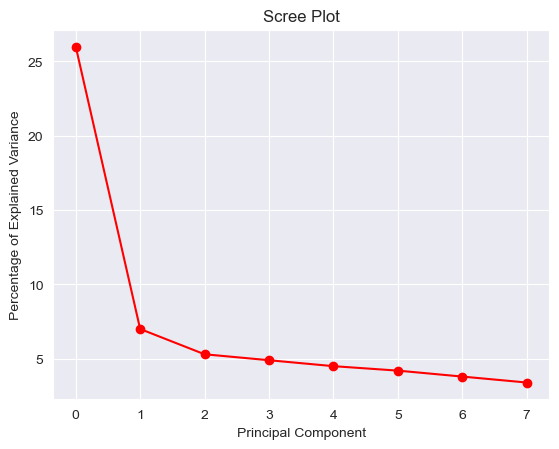

<Figure size 1000x1000 with 0 Axes>

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.722477,-0.685591,-3.231864,1.044430,0.913074,0.078755,-1.242585,0.386836
1,5.353154,-1.232919,-0.998775,-1.613129,-1.020011,0.022953,0.128322,-0.460402
2,3.406730,-1.053158,2.102086,-0.191389,-1.911470,-0.460633,-0.343206,-1.422387
3,-1.407289,1.695552,-0.258043,-1.178143,-0.134188,1.210767,0.611777,-0.016246
4,3.755245,-1.679040,-0.805204,1.991561,1.209266,-1.890523,0.948793,-0.061634
...,...,...,...,...,...,...,...,...
6995,3.056160,-0.959781,1.443411,1.483314,-0.683349,-0.735340,-0.272933,-1.611649
6996,4.699537,-1.515123,-1.652439,-0.820652,-0.760275,-0.209491,0.520513,-0.660291
6997,-2.521616,0.297299,2.328735,0.211647,-1.032533,0.158311,-0.905371,-1.149686
6998,-3.013246,-1.873799,-2.405061,1.401219,0.750614,0.248405,-0.157547,-0.288218


In [118]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
df_train2 = df_train.copy()
scaled_df_train2 = preprocessing.scale(df_train2)
pca = PCA(n_components=8)
pca.fit(scaled_df_train2)
pca_data = pca.transform(scaled_df_train2)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
plt.plot(per_var,'ro-')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.figure(figsize=(10,10))
plt.show()
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df


In [119]:
pca.explained_variance_ratio_.cumsum() # 16PC's explicam 81% da variância

array([0.26022339, 0.3298503 , 0.38246473, 0.43137873, 0.47592353,
       0.51749734, 0.55572143, 0.59006249])

## Loading Scores for each PC

In [120]:
loading_scores = pd.Series(pca.components_[1], index=df_train2.columns)
sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)
top_8 = sorted_loading_scores.index.values
print(loading_scores[top_8])

Children_6to18           0.479822
NumOfferPurchases        0.361500
Total_Kids               0.354247
has_Kids                 0.320396
NumAppPurchases          0.307874
Age                      0.268223
MntMeat&Fish             0.207311
NumStorePurchases        0.162139
daysAsCardClient         0.160204
PhD                      0.129139
NumAppVisitsMonth        0.121710
Response_Cmp2            0.116685
Income                   0.115954
Single                  -0.114705
MntAdditionalRequests    0.105030
Abv_Avg_Mnt              0.094305
Widow                    0.081637
HighSchool              -0.080837
Response_Cmp5            0.080316
NumTakeAwayPurchases     0.079562
Graduation              -0.073288
MntTotal                 0.066363
MntEntries              -0.062593
Master                   0.061901
MntDrinks               -0.057360
MntDesserts             -0.052984
Married                  0.051472
Response_Cmp3           -0.047392
Gender                   0.039499
Response_Cmp1 

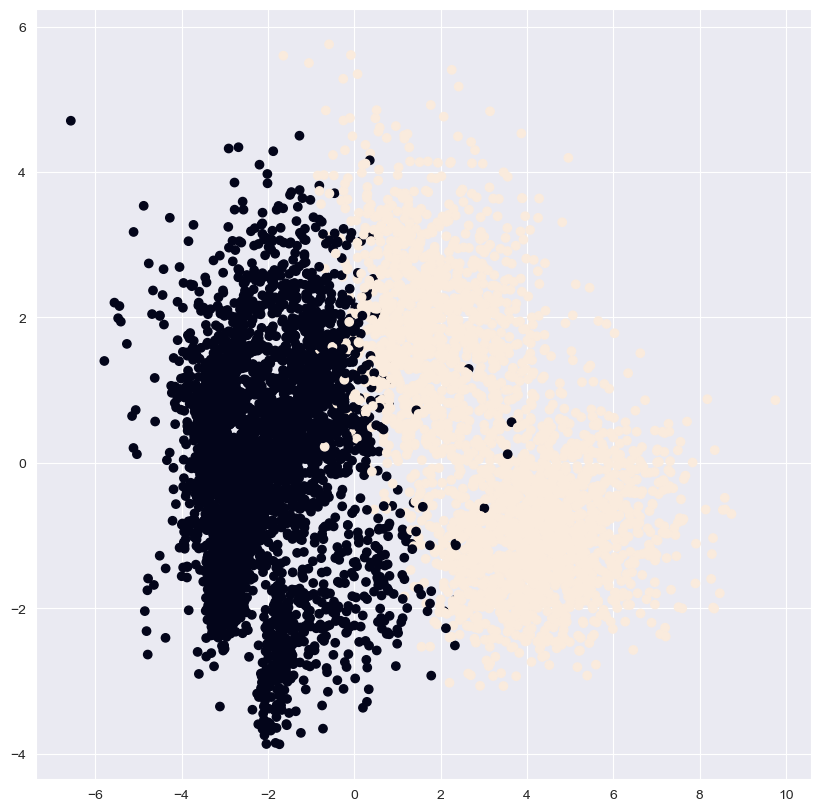

In [121]:
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=df_train['Abv_Avg_Mnt'])


##  Correlação entre PC's e as variáveis originais

<AxesSubplot:>

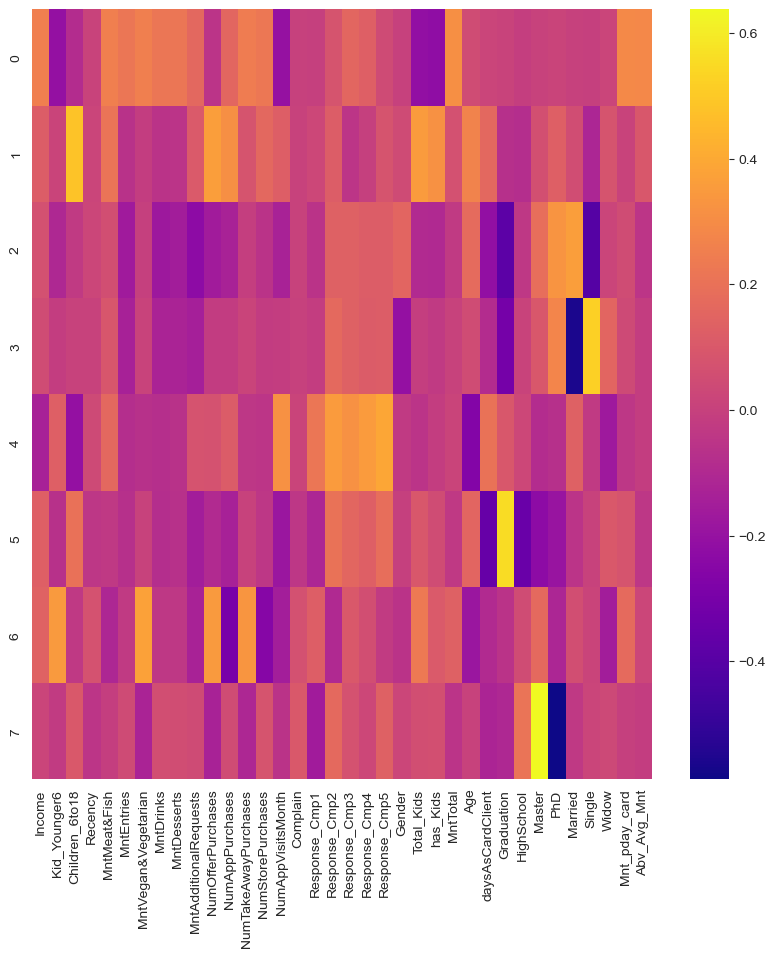

In [122]:
df_comp = pd.DataFrame(pca.components_,columns=df_train2.columns)
plt.figure(figsize=(10,10))
sns.heatmap(df_comp,cmap='plasma')

## Model Train

In [ ]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters = 6, max_iter =100, random_state= 1)
kmeans.fit(df_train)
kmeans.labels_

### 3.2.2. Misclassifications

### 3.2.3. Incoherencies

### 3.2.4. Binning

### 3.2.5. Reclassification

### 3.2.6. Power Transform

## 3.3. Data Reduction

### 3.3.1. Multicollinearity - Check correlation

### 3.3.2. Unary Variables

### 3.3.3. Variables with a high percentage of missing values

## 3.2. Back to Data Transformation

### 3.2.7. Apply ordinal encoding and create Dummy variables

### 3.2.8. Scaling